## Prompt Sensitivity bar charts for Implicit Dataset

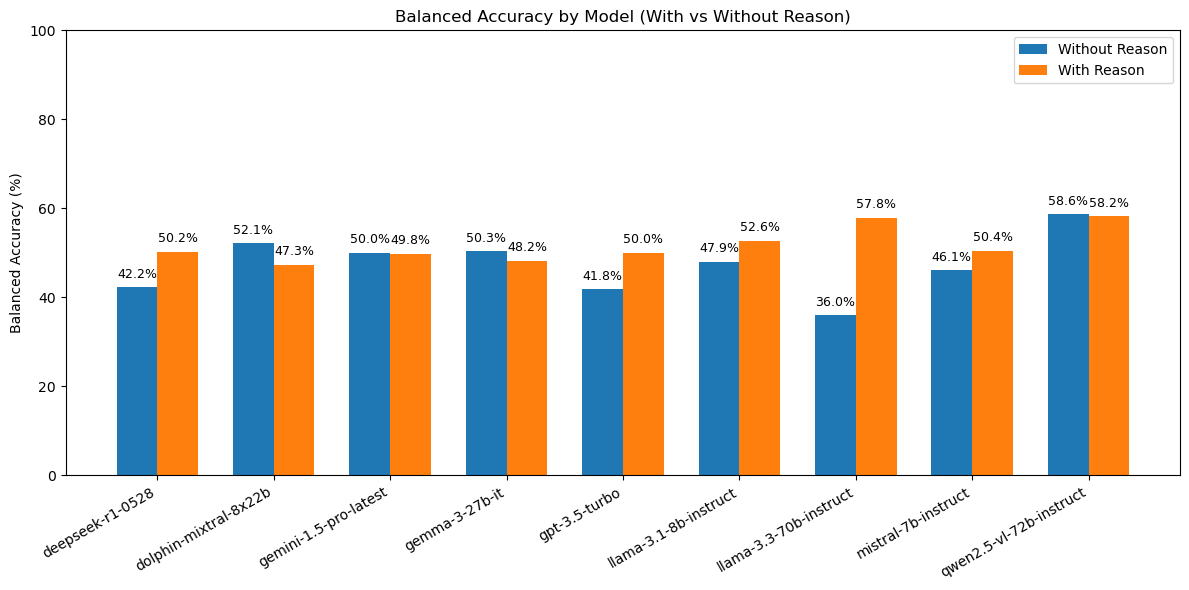

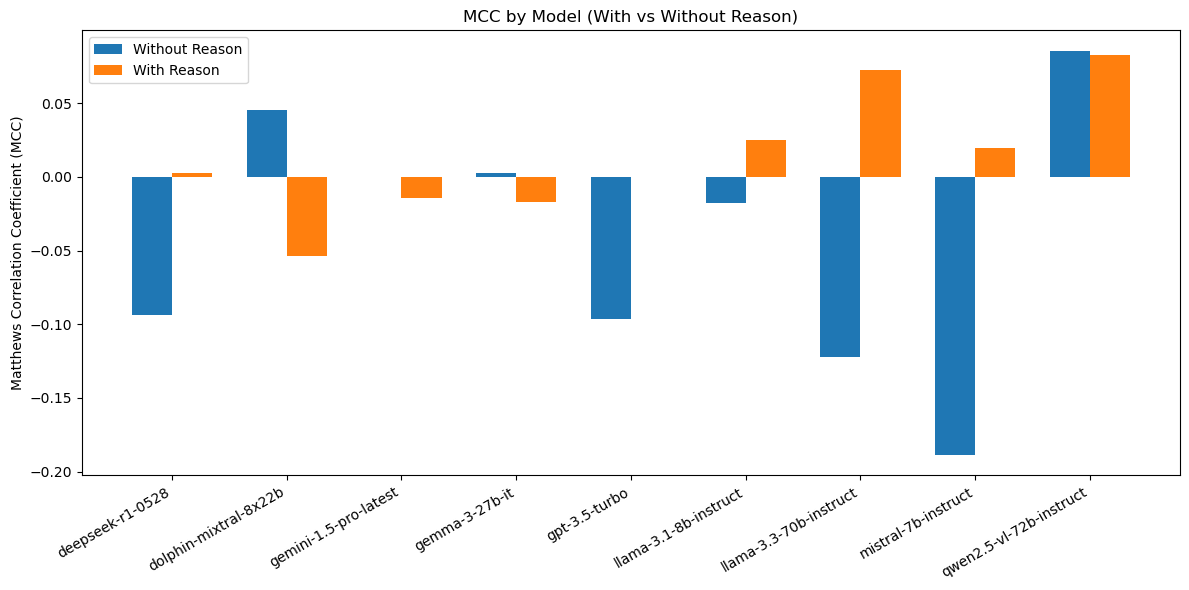

In [20]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = "../new_results"
metric_keys = ["balanced_accuracy", "mcc"]

# === Step 1: Collect data ===
results = {}

for model in os.listdir(BASE_PATH):
    model_dir = os.path.join(BASE_PATH, model)
    if not os.path.isdir(model_dir):
        continue

    model_data = {}
    for version in ["with_reason_base", "without_reason_base"]:
        subfolders = [f for f in os.listdir(model_dir) if f.endswith(version)]
        if not subfolders:
            continue
        latest_folder = sorted(subfolders)[-1]
        summary_path = os.path.join(model_dir, latest_folder, "summary.json")
        if os.path.exists(summary_path):
            with open(summary_path, "r") as f:
                summary = json.load(f)
            model_data[version] = {
                "balanced_accuracy": summary.get("balanced_accuracy", 0),
                "mcc": summary.get("mcc", 0)
            }
    results[model] = model_data

# === Step 2: Prepare plot data ===
models = sorted(results.keys())
with_vals = [results[m]["with_reason_base"][metric_keys[0]] for m in models]
without_vals = [results[m]["without_reason_base"][metric_keys[0]] for m in models]

# === Step 3: Plot Balanced Accuracy ===
with_vals_pct = [results[m]["with_reason_base"]["balanced_accuracy"] * 100 for m in models]
without_vals_pct = [results[m]["without_reason_base"]["balanced_accuracy"] * 100 for m in models]

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, without_vals_pct, width, label='Without Reason')
bars2 = ax.bar(x + width/2, with_vals_pct, width, label='With Reason')

# Axis & titles
ax.set_ylabel('Balanced Accuracy (%)')
ax.set_title('Balanced Accuracy by Model (With vs Without Reason)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha="right")
ax.set_ylim(0, 100)
ax.legend()

# Add % labels
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1.5,
        f'{height:.1f}%',
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.savefig('balanced_acc.png')
plt.show()

# === Step 4: Plot MCC ===
with_vals_mcc = [results[m]["with_reason_base"]["mcc"] for m in models]
without_vals_mcc = [results[m]["without_reason_base"]["mcc"] for m in models]

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, without_vals_mcc, width, label='Without Reason')
bars2 = ax.bar(x + width/2, with_vals_mcc, width, label='With Reason')

ax.set_ylabel('Matthews Correlation Coefficient (MCC)')
ax.set_title('MCC by Model (With vs Without Reason)')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha="right")
ax.legend()

plt.tight_layout()
plt.savefig('mcc.png')
plt.show()
